In [2]:
import numpy as np
import pandas as pd
from myfunctions import BPstar
from myfunctions import BPstarmodel
import matplotlib.pyplot as plt
import os
from est_model import estimate_model

# Initialisation, simulation, et replications

works well:
#initialisations des parametres du modele pour simulation
A = np.array([[0.2, 0],[0, 0.4]])
B = np.array([[0.5, 0],[0, 0.3]])
omeg = np.array([0.3, 0.5])
delt = 0.7
n = 500 #longeure de la trajectoire

## Simulation d'une trajectoire

### Paramètres de la simulation:

#### Graphes


## Replications


In [3]:
parameters = {
    'M1': {
        'A': np.array([[0.3, 0.2], [0.1, 0.3]]),
        'B': np.array([[0.1, 0.2], [0.3, 0.2]]),
        'omeg': np.array([0.5, 0.3]),
        'delt': 0.4
        
    },
    'M2': {
        'A': np.array([[0.2, 0], [0, 0.4]]),
        'B': np.array([[0.5, 0], [0, 0.3]]),
        'omeg': np.array([0.3, 0.5]),
        'delt': 0.7
    },
    'M3': {
        'A': np.array([[0.2, 0.0], [0.0, 0.4]]),
        'B': np.array([[0.5, 0.1], [0.3, 0.2]]),
        'omeg': np.array([0.3, 0.5]),
        'delt': 0.7
    },
    'M4': {
        'A': np.array([[0.2, 0.3], [0.4, 0.2]]),
        'B': np.array([[0.2, 0], [0, 0.3]]),
        'omeg': np.array([0.5, 0.3]),
        'delt': -0.5
    }
}

In [4]:
for model_name in parameters:
    parameters[model_name]['real_params'] = [
        parameters[model_name]['omeg'][0],
        *parameters[model_name]['A'][0],
        *parameters[model_name]['B'][0],
        parameters[model_name]['omeg'][1],
        *parameters[model_name]['A'][1],
        *parameters[model_name]['B'][1]
    ] 
    print(parameters[model_name]['real_params'])

[0.5, 0.3, 0.2, 0.1, 0.2, 0.3, 0.1, 0.3, 0.3, 0.2]
[0.3, 0.2, 0.0, 0.5, 0.0, 0.5, 0.0, 0.4, 0.0, 0.3]
[0.3, 0.2, 0.0, 0.5, 0.1, 0.5, 0.0, 0.4, 0.3, 0.2]
[0.5, 0.2, 0.3, 0.2, 0.0, 0.3, 0.4, 0.2, 0.0, 0.3]


In [5]:
model_specs = {
    'M1': {'indices': range(10)},
    'M2': {'indices': [0, 1, 3, 5, 7, 9]},
    'M3': {'indices': [0, 1, 3, 4, 5, 7, 8, 9]},
    'M4': {'indices': [0, 1, 2, 3, 5, 6, 7, 9]}
}

### Simulation repliquée

In [6]:
#nombre de replications
nrep = 200

In [7]:
#on va faire des replications pour des tailles de series differentes
sizes = [200, 500, 1000]

In [8]:
#on cree un sous fichier pour y sauvegarder les replications
base_folder = "replications"
os.makedirs(base_folder, exist_ok=True)

### Estimation des replications

### Statistiques sur les estimations


generation d'un fichier csv modelestim_{model}_{size}.csv qui a la bonne taille de parametres 

### Boxplot

### Erreurs MADE et MSE

In [24]:
a = np.array([2,4,6])
b = np.array([1,1,1])
(a-b)**2

array([ 1,  9, 25])

In [30]:
# Create a dictionary to store MADE and MSE for each model and size
errors = {}

In [31]:
for model in parameters:
    errors[model] = {'MADE': [], 'MSE': []} #add to the dictionary
    model_folder = os.path.join(base_folder, model)
    for size in sizes:
        size_folder = os.path.join(model_folder, f"size_{size}")
        filename = f"modelestim_{model}_{size}.csv"
        filepath = os.path.join(size_folder, filename)
        data = np.loadtxt(filepath, delimiter=',')
        print(f"loaded data: {filename} with shape {np.shape(data)}")
        # Load the statistics DataFrame
        estimstat_filename = f"estimstat_{model}_{size}.csv"
        estimstat_filepath = os.path.join(size_folder, estimstat_filename)
        estimstat_df = pd.read_csv(estimstat_filepath)
        # Access the 'Real Value' column
        real_par = estimstat_df['Real Value'].values
        #'Real Value' column as a NumPy array
        print(f"param reels: {real_par}")
        #on a besoin de charger cette colonne qu'a chaque iteration du modele en verité
        MADE = np.zeros(len(real_par)) # Initialize MADE
        MSE = np.zeros(len(real_par))  # Initialize MSE
        for i in range(nrep):
            MADE += abs(data[:,i]-real_par) / nrep
            MSE += ((data[:,i]-real_par)**2) / nrep
        print(f"MADE = {MADE}")
        print(f"MSE = {MSE}")
        #add to dictionary
        errors[model]['MADE'].append(MADE)
        errors[model]['MSE'].append(MSE)
    
        
        

loaded data: modelestim_M1_200.csv with shape (10, 200)
param reels: [0.5 0.3 0.2 0.1 0.2 0.3 0.1 0.3 0.3 0.2]
MADE = [0.32201392 0.30236081 0.25311604 0.05891005 0.42772159 0.3057536
 0.29185527 0.24012802 0.42264402 0.05961815]
MSE = [0.21268557 0.15393967 0.10578232 0.00526124 0.31627363 0.17113919
 0.15202638 0.09888855 0.30445629 0.00590776]
loaded data: modelestim_M1_500.csv with shape (10, 200)
param reels: [0.5 0.3 0.2 0.1 0.2 0.3 0.1 0.3 0.3 0.2]
MADE = [0.20333921 0.19034426 0.15523206 0.03906004 0.29975802 0.20250586
 0.21354307 0.16986268 0.29309683 0.03900639]
MSE = [0.07735054 0.06904439 0.04462939 0.00227007 0.15242006 0.0759698
 0.07907779 0.04828518 0.1461007  0.00230483]
loaded data: modelestim_M1_1000.csv with shape (10, 200)
param reels: [0.5 0.3 0.2 0.1 0.2 0.3 0.1 0.3 0.3 0.2]
MADE = [0.1310687  0.18059589 0.1522022  0.02665781 0.2516751  0.14036811
 0.17314173 0.14665159 0.24472848 0.02717183]
MSE = [0.0290307  0.05291348 0.0372651  0.00106939 0.1069047  0.031285

#### Graphes des erreurs

In [ ]:
# Plotting
for model in parameters:
    num_params = len(errors[model]['MADE'][0])
    fig, axes = plt.subplots(num_params, 1, figsize=(4.25, 2 * num_params), sharex=True) # Adjust figsize for half A4 width
    fig.suptitle(f"MADE and MSE for Model {model} - Each Parameter", fontsize=10)  # Smaller font size for title

    for p in range(num_params):
        ax = axes[p]
        made_values = [errors[model]['MADE'][s][p] for s in range(len(sizes))]
        mse_values = [errors[model]['MSE'][s][p] for s in range(len(sizes))]

        bar_width = 0.2  # Narrower bars
        ax.bar(np.arange(len(sizes)), made_values, bar_width, label='MADE')
        ax.bar(np.arange(len(sizes)) + bar_width, mse_values, bar_width, label='MSE')

        ax.set_xticks(np.arange(len(sizes)) + bar_width / 2)
        ax.set_xticklabels(sizes, fontsize=8)  # Smaller font size for x-axis labels
        ax.set_xlabel("Sample Size", fontsize=8)
        ax.set_ylabel(f"Error (Parameter {p+1})", fontsize=8)
        ax.legend(fontsize=8)  # Smaller font size for legend

    plt.tight_layout()
    plt.subplots_adjust(top=0.90, bottom=0.1, hspace=0.4)  # Adjust spacing
    plt.show()

In [ ]:
# Plotting
for model in parameters:
    num_params = len(errors[model]['MADE'][0])
    fig, axes = plt.subplots(num_params, 1, figsize=(4.25, 2 * num_params), sharex=True)
    fig.suptitle(f"MADE and MSE for Model {model}", fontsize=10)

    bar_width = 0.3 

    for p in range(num_params):
        ax = axes[p]
        made_values = [errors[model]['MADE'][s][p] for s in range(len(sizes))]
        mse_values = [errors[model]['MSE'][s][p] for s in range(len(sizes))]

        ax.bar(np.arange(len(sizes)), made_values, bar_width, label='MADE')
        ax.bar(np.arange(len(sizes)) + bar_width, mse_values, bar_width, label='MSE')

        ax.set_xticks(np.arange(len(sizes)) + bar_width / 2)
        ax.set_xticklabels(sizes, fontsize=8)
        ax.set_xlabel("Sample Size", fontsize=8)
        ax.set_ylabel(f"Error (Parameter {p+1})", fontsize=8)
        ax.legend(fontsize=8)

        # Remove top and right spines for a cleaner look
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Add horizontal dotted line separator (optional)
        if p < num_params - 1: 
            ax.axhline(ax.get_ylim()[1], color='gray', linestyle='dotted', linewidth=0.8)

    plt.tight_layout()
    plt.subplots_adjust(top=0.90, bottom=0.1, hspace=0.3)  # Adjust hspace for spacing 
    plt.show()

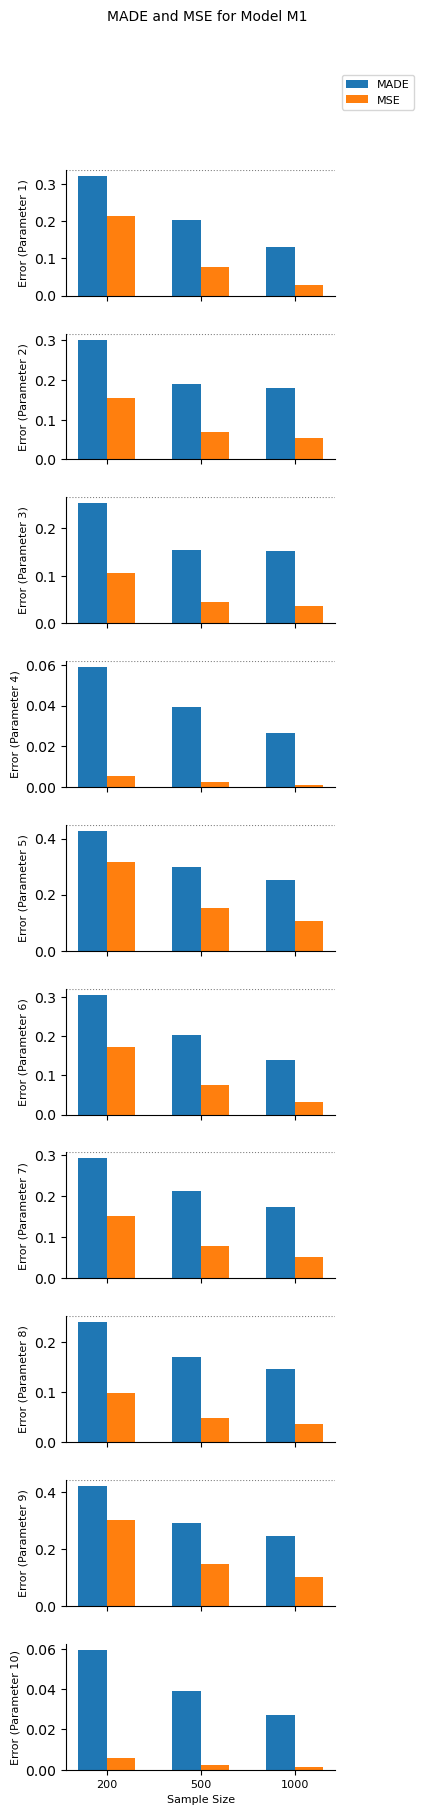

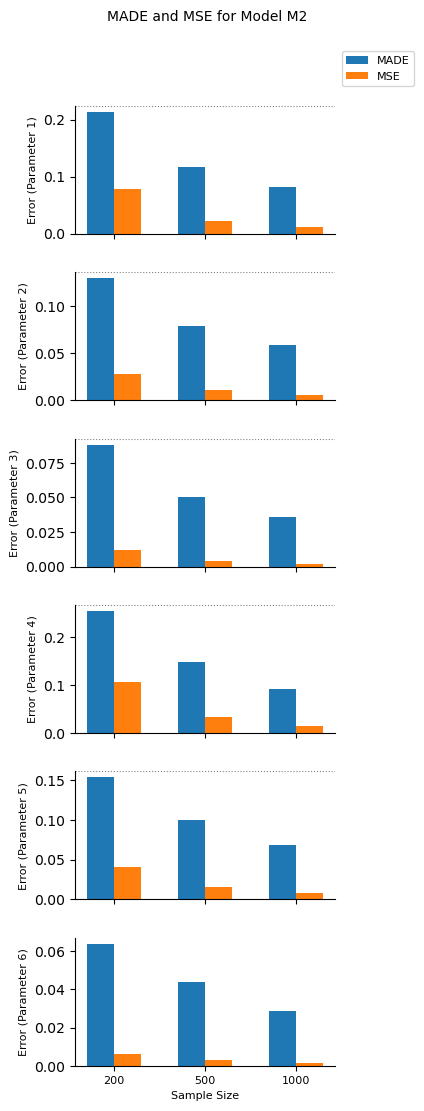

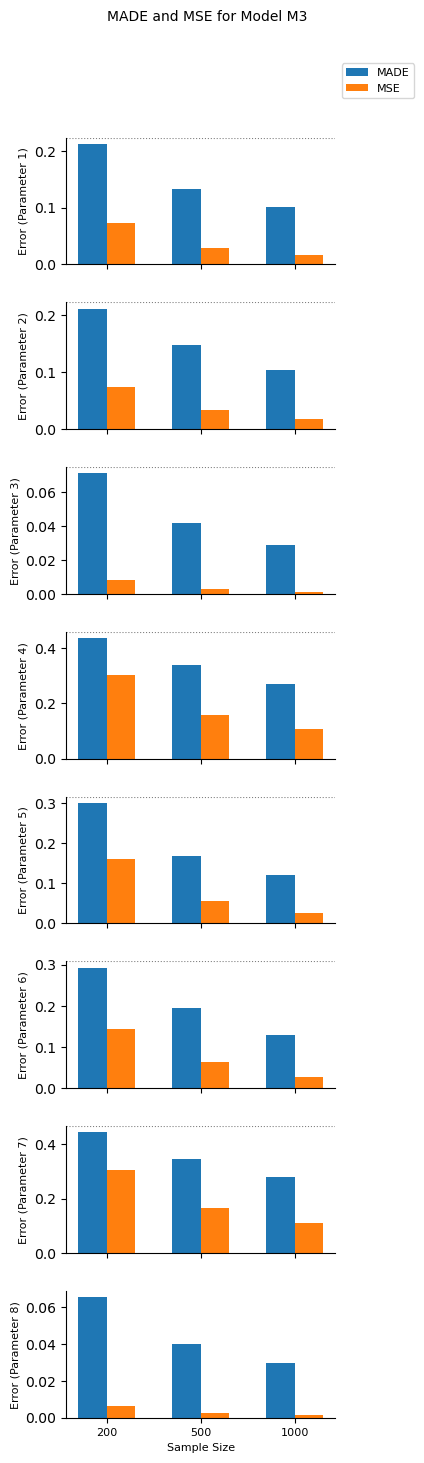

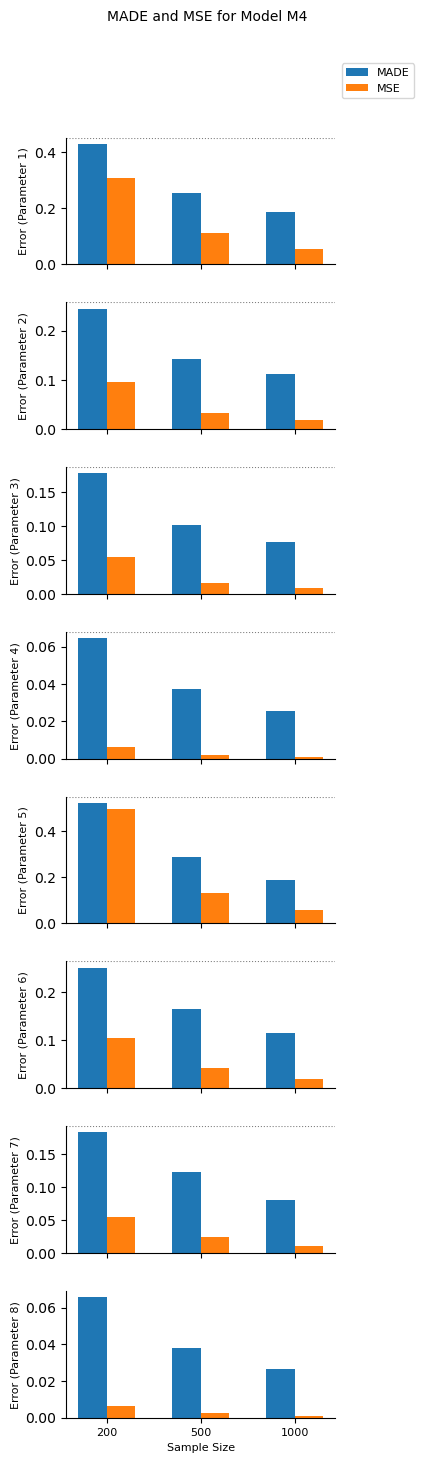

In [38]:
# Plotting
for model in parameters:
    num_params = len(errors[model]['MADE'][0])
    fig, axes = plt.subplots(num_params, 1, figsize=(4.25, 2 * num_params), sharex=True)
    fig.suptitle(f"MADE and MSE for Model {model}", fontsize=10)

    bar_width = 0.3 

    # Create the legend handles and labels only once
    handles = []
    labels = []

    for p in range(num_params):
        ax = axes[p]
        made_values = [errors[model]['MADE'][s][p] for s in range(len(sizes))]
        mse_values = [errors[model]['MSE'][s][p] for s in range(len(sizes))]

        bar1 = ax.bar(np.arange(len(sizes)), made_values, bar_width, label='MADE')
        bar2 = ax.bar(np.arange(len(sizes)) + bar_width, mse_values, bar_width, label='MSE')

        ax.set_xticks(np.arange(len(sizes)) + bar_width / 2)

        # Only set x-axis label for the bottom subplot
        if p == num_params - 1:
            ax.set_xticklabels(sizes, fontsize=8)
            ax.set_xlabel("Sample Size", fontsize=8) 
        else:
            ax.set_xticklabels([]) # Remove x-tick labels for other subplots

        ax.set_ylabel(f"Error (Parameter {p+1})", fontsize=8)

        # Remove spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Add horizontal dotted line separator (optional)
        if p < num_params - 1:
            ax.axhline(ax.get_ylim()[1], color='gray', linestyle='dotted', linewidth=0.8)

        # Collect handles and labels for the legend (only once)
        if p == 0:
            handles.append(bar1)
            handles.append(bar2)
            labels.append('MADE')
            labels.append('MSE')

    # Place the legend outside the plot
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=8)

    plt.tight_layout()
    plt.subplots_adjust(top=0.90, bottom=0.1, hspace=0.3, right=0.8)  # Adjust right for legend
    plt.show()